In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
#dataset
df = pd.read_csv("data/Processed/citibike_2022_with_weather.csv")

# Make sure date is datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

#Keeping only 2022 (just in case other years slipped in)
df = df[df["date"].dt.year == 2022].copy()

df.head()

/var/folders/wf/s0crnzgd66b7pdj9_7_b6mpw0000gn/T/ipykernel_2169/3065790675.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Processed/citibike_2022_with_weather.csv")


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,3A2034DA67C8874B,electric_bike,2022-09-14 20:37:39.155,2022-09-14 21:05:39.760,N 12 St & Bedford Ave,5450.04,Albany St & Greenwich St,5145.02,40.720796,-73.954882,40.709267,-74.013247,casual,2022-09-14,22.9,both
1,F1C63DACDCC1C33D,electric_bike,2022-09-17 19:21:39.407,2022-09-17 20:08:32.670,Union Ave & Jackson St,5300.06,Metropolitan Ave & Meeker Ave,5300.05,40.716075,-73.952029,40.714133,-73.952344,casual,2022-09-17,20.8,both
2,94372C52777F4AC1,electric_bike,2022-09-17 16:49:21.830,2022-09-17 17:01:51.537,S 4 St & Wythe Ave,5204.05,St Marks Pl & 1 Ave,5626.13,40.712874,-73.965935,40.727791,-73.985649,casual,2022-09-17,20.8,both
3,44818FEC94B62B66,electric_bike,2022-09-08 12:27:40.019,2022-09-08 12:47:15.649,Amsterdam Ave & W 73 St,7260.09,Washington St & Gansevoort St,6039.06,40.779668,-73.980930,40.739323,-74.008119,casual,2022-09-08,21.8,both
4,F8A63709F214EBAA,classic_bike,2022-09-16 19:00:19.266,2022-09-16 19:07:28.905,University Pl & E 14 St,5905.14,Washington St & Gansevoort St,6039.06,40.734814,-73.992085,40.739323,-74.008119,member,2022-09-16,19.6,both


In [4]:
#Creating a daily weather dataframe: one row per date with mean daily temperature
weather_df = (
    df.groupby("date")["avgTemp"]
      .mean()
      .to_frame(name="avgTemp")
      .sort_index())
weather_df.head()

,avgTemp
date,
2022-01-01,11.6
2022-01-02,11.4
2022-01-03,1.4
2022-01-04,-2.7
2022-01-05,3.2


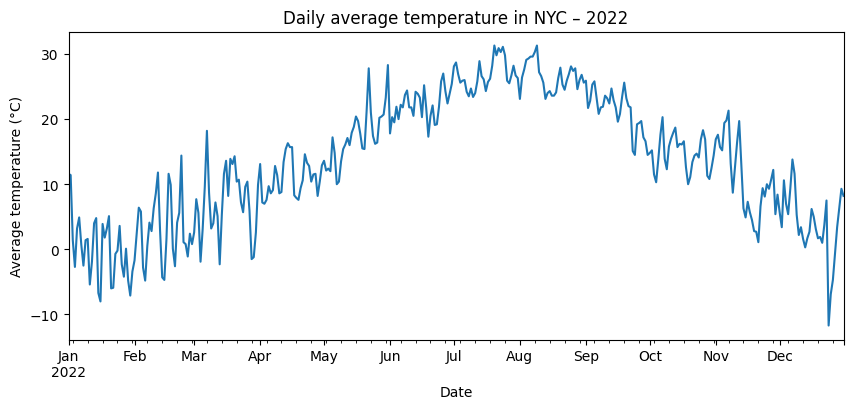

In [5]:
#Plotting
weather_df["avgTemp"].plot(figsize=(10, 4))

plt.title("Daily average temperature in NYC – 2022")
plt.xlabel("Date")
plt.ylabel("Average temperature (°C)")
plt.show()

In [6]:
#Creating a column with the count of trips per day
#Not dropping duplicates
trips_per_day = (
    df.groupby("date")["ride_id"]
      .count()
      .reset_index(name="bike_rides_daily")
      .sort_values("date"))
trips_per_day.head()

,date,bike_rides_daily
0,2022-01-01,20428
1,2022-01-02,43009
2,2022-01-03,33189
3,2022-01-04,36842
4,2022-01-05,34230


In [7]:
#Reseting index to get 'date' as a column for the merge
weather_for_merge = weather_df.reset_index()

#Merging daily trip counts into the weather dataframe
df_temp = weather_for_merge.merge(trips_per_day, on="date", how="left")

#Setting date back as index
df_temp = df_temp.set_index("date").sort_index()

df_temp.head()

,avgTemp,bike_rides_daily
date,,
2022-01-01,11.6,20428
2022-01-02,11.4,43009
2022-01-03,1.4,33189
2022-01-04,-2.7,36842
2022-01-05,3.2,34230


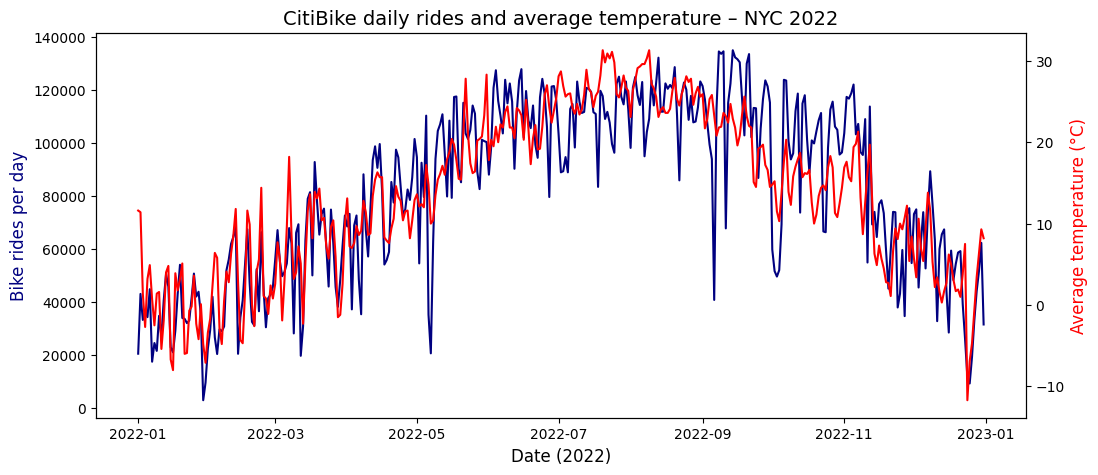

In [8]:
#plotting, dual axis
fig, ax = plt.subplots(figsize=(12, 5))

#Left y-axis;bike rides per day
ax.plot(df_temp.index, df_temp["bike_rides_daily"], color="navy")
ax.set_xlabel("Date (2022)", fontsize=12)
ax.set_ylabel("Bike rides per day", color="navy", fontsize=12)

#Right y-axis;temperature
ax2 = ax.twinx()
ax2.plot(df_temp.index, df_temp["avgTemp"], color="red")
ax2.set_ylabel("Average temperature (°C)", color="red", fontsize=12)

plt.title("CitiBike daily rides and average temperature – NYC 2022", fontsize=14)
plt.show()